### Purpose

The purpose of this notebook was to take the data found in the `LifeExpectancyAtBirth` folder and analyze it for the United States. 

### Findings

The graph at the bottom of the notebook shows that the average age of a United States citizen has been increasing through the past 15 years. 

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
life = pd.read_csv('~/Documents/EECS/EECS_731/HW/EECS731_1/data/LifeExpectancyAtBirth/data.csv', skiprows=3)

In [4]:
life.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

In [5]:
life = life.drop(columns="Country Code")

In [6]:
life = life.drop(columns="Indicator Name")

In [7]:
life = life.drop(columns="Indicator Code")

In [8]:
life= life.drop(life.loc[:,'1960':'2000'].columns, axis=1)

In [9]:
life

,Country Name,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,73.853000,73.937000,74.038000,74.156000,74.287000,74.429000,74.576000,74.725000,74.87200,...,75.15800,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,NaN,NaN
1,Afghanistan,56.308000,56.784000,57.271000,57.772000,58.290000,58.826000,59.375000,59.930000,60.48400,...,61.55300,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,NaN,NaN
2,Angola,47.059000,47.702000,48.440000,49.263000,50.165000,51.143000,52.177000,53.243000,54.31100,...,56.33000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,NaN,NaN
3,Albania,74.288000,74.579000,74.828000,75.039000,75.228000,75.423000,75.646000,75.912000,76.22100,...,76.91400,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000,78.458000,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,67.997561,67.943902,68.195122,68.446341,68.695122,68.946341,69.197561,69.397561,69.64878,...,70.14878,70.497561,70.797561,71.097561,71.346341,71.646341,71.946341,72.195122,NaN,NaN
260,"Yemen, Rep.",61.216000,61.781000,62.358000,62.931000,63.481000,63.997000,64.470000,64.892000,65.25500,...,65.76800,65.920000,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,NaN,NaN
261,South Africa,55.089000,54.310000,53.749000,53.444000,53.447000,53.795000,54.452000,55.360000,56.46000,...,58.89500,60.060000,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,NaN,NaN
262,Zambia,44.615000,45.400000,46.322000,47.354000,48.496000,49.757000,51.134000,52.606000,54.13000,...,57.12600,58.502000,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,NaN,NaN


In [10]:
life = life[life["Country Name"] == "United States"]

In [11]:
life

,Country Name,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
249,United States,76.836585,76.936585,77.036585,77.487805,77.487805,77.687805,77.987805,78.039024,78.390244,...,78.641463,78.741463,78.741463,78.841463,78.690244,78.539024,78.539024,78.539024,NaN,NaN


In [12]:
life = life.drop(columns="Unnamed: 64")

In [13]:
life= life.drop(life.loc[:,'2018':'2019'].columns, axis=1)

In [14]:
life = life.replace('', np.nan).set_index('Country Name').stack().reset_index(name='Average Age').drop('level_1',1)

In [15]:
life

,Country Name,Average Age
0,United States,76.836585
1,United States,76.936585
2,United States,77.036585
3,United States,77.487805
4,United States,77.487805
5,United States,77.687805
6,United States,77.987805
7,United States,78.039024
8,United States,78.390244
9,United States,78.541463


In [16]:
life.insert(2,"Year", [2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017], True)

In [17]:
life

,Country Name,Average Age,Year
0,United States,76.836585,2001
1,United States,76.936585,2002
2,United States,77.036585,2003
3,United States,77.487805,2004
4,United States,77.487805,2005
5,United States,77.687805,2006
6,United States,77.987805,2007
7,United States,78.039024,2008
8,United States,78.390244,2009
9,United States,78.541463,2010


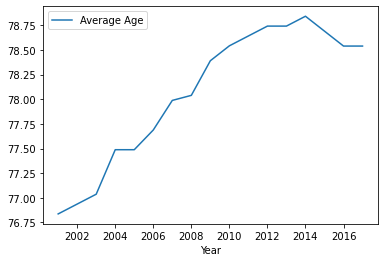

In [18]:
life.plot(y='Average Age', x='Year')

In [19]:
life

,Country Name,Average Age,Year
0,United States,76.836585,2001
1,United States,76.936585,2002
2,United States,77.036585,2003
3,United States,77.487805,2004
4,United States,77.487805,2005
5,United States,77.687805,2006
6,United States,77.987805,2007
7,United States,78.039024,2008
8,United States,78.390244,2009
9,United States,78.541463,2010


In [20]:
life.to_csv('life_US.csv')